In [73]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [74]:
ff1.Cache.enable_cache('Cache')

In [75]:
plotting.setup_mpl()

c:\Users\REDA\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\plotting\_plotting.py:90: FutureWarning: FastF1 will no longer silently modify the default Matplotlib colors in the future.
To remove this warning, explicitly set `color_scheme=None` or `color_scheme='fastf1'` when calling `.setup_mpl()`.
  warnings.warn(
c:\Users\REDA\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [76]:
year= 2021
gp = 'Abu Dhabi'
event  ='R'
driver01 = 'VER'
driver02 = 'HAM'

session_event = ff1.get_session(year, gp, event)
session_event.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 9
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 9)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '55', '22', '10',

In [77]:
session_event._drivers_results_from_ergast()

,DriverId,DriverNumber,TeamId
DriverNumber,,,
33,max_verstappen,33,red_bull
44,hamilton,44,mercedes
55,sainz,55,ferrari
22,tsunoda,22,alphatauri
10,gasly,10,alphatauri
77,bottas,77,mercedes
4,norris,4,mclaren
14,alonso,14,alpine
31,ocon,31,alpine


In [78]:
laps = session_event.laps
drivers = [driver01, driver02]
compare_drivers = laps[laps["Driver"].isin(drivers)]
compare_drivers

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
459,0 days 01:03:54.867000,VER,33,0 days 00:01:32.800000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:38.428000,...,False,Red Bull Racing,0 days 01:02:21.871000,2021-12-12 13:03:21.881,1,2.0,False,,False,False
460,0 days 01:05:23.970000,VER,33,0 days 00:01:29.103000,2.0,1.0,NaT,NaT,0 days 00:00:18.116000,0 days 00:00:38.026000,...,False,Red Bull Racing,0 days 01:03:54.867000,2021-12-12 13:04:54.877,1,2.0,False,,False,True
461,0 days 01:06:52.797000,VER,33,0 days 00:01:28.827000,3.0,1.0,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.043000,...,False,Red Bull Racing,0 days 01:05:23.970000,2021-12-12 13:06:23.980,1,2.0,False,,False,True
462,0 days 01:08:21.823000,VER,33,0 days 00:01:29.026000,4.0,1.0,NaT,NaT,0 days 00:00:18.019000,0 days 00:00:38.125000,...,False,Red Bull Racing,0 days 01:06:52.797000,2021-12-12 13:07:52.807,1,2.0,False,,False,True
463,0 days 01:09:50.541000,VER,33,0 days 00:01:28.718000,5.0,1.0,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.083000,...,False,Red Bull Racing,0 days 01:08:21.823000,2021-12-12 13:09:21.833,1,2.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0 days 02:23:46.163000,HAM,44,0 days 00:02:22.911000,54.0,2.0,NaT,NaT,0 days 00:00:20.441000,0 days 00:01:03.942000,...,False,Mercedes,0 days 02:21:23.252000,2021-12-12 14:22:23.262,4,1.0,False,,False,False
629,0 days 02:26:18.262000,HAM,44,NaT,55.0,2.0,NaT,NaT,0 days 00:00:30.509000,0 days 00:01:03.611000,...,False,Mercedes,0 days 02:23:46.163000,2021-12-12 14:24:46.173,4,1.0,False,,False,False
630,0 days 02:28:44.023000,HAM,44,0 days 00:02:25.761000,56.0,2.0,NaT,NaT,0 days 00:00:30.973000,0 days 00:00:59.223000,...,False,Mercedes,0 days 02:26:18.262000,2021-12-12 14:27:18.272,4,1.0,False,,False,False
631,0 days 02:31:12.354000,HAM,44,0 days 00:02:28.331000,57.0,2.0,NaT,NaT,0 days 00:00:28.439000,0 days 00:01:02.795000,...,False,Mercedes,0 days 02:28:44.023000,2021-12-12 14:29:44.033,41,1.0,False,,False,False


In [79]:
fastest_lap_driver01 = laps.pick_driver(driver01).pick_fastest()
fastest_lap_driver02 = laps.pick_driver(driver02).pick_fastest()


In [80]:
telemetry_driver01 = fastest_lap_driver01.get_telemetry().add_distance()
telemetry_driver02 = fastest_lap_driver02.get_telemetry().add_distance()



core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [81]:
telemetry_driver01['Driver'] = driver01
telemetry_driver02['Driver'] = driver02
telemetry_drivers = pd.concat([telemetry_driver01,telemetry_driver02])


In [82]:
telemetry_drivers

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2021-12-12 14:00:42.895,0 days 01:59:42.885000,,1102.774167,0 days 00:00:00,11603,228,5,100,False,0,interpolation,0.000018,OnTrack,540.000000,2076.000000,-238.000000,0.000000,VER
3,2021-12-12 14:00:42.922,0 days 01:59:42.912000,,1102.774167,0 days 00:00:00.027000,11345,230,5,100,False,0,pos,0.000354,OnTrack,558.000000,2079.000000,-239.000000,1.725000,VER
4,2021-12-12 14:00:43.084,0 days 01:59:43.074000,,1102.774167,0 days 00:00:00.189000,10828,235,6,100,False,0,car,0.002385,OnTrack,662.000000,2092.000000,-239.000000,12.300000,VER
5,2021-12-12 14:00:43.142,0 days 01:59:43.132000,,1102.774167,0 days 00:00:00.247000,10916,237,6,100,False,0,pos,0.003120,OnTrack,700.000000,2097.000000,-240.000000,16.118333,VER
6,2021-12-12 14:00:43.324,0 days 01:59:43.314000,44,1102.774167,0 days 00:00:00.429000,11005,240,6,100,False,0,car,0.005447,OnTrack,819.000000,2111.000000,-239.000000,28.251667,VER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,2021-12-12 14:07:40.446,0 days 02:06:40.436000,,NaN,0 days 00:01:26.291000,11752,219,5,100,False,0,car,0.994141,OnTrack,324.847279,2052.659671,-237.551819,5192.224444,HAM
762,2021-12-12 14:07:40.541,0 days 02:06:40.531000,,NaN,0 days 00:01:26.386000,11485,223,5,100,False,0,pos,0.995277,OnTrack,385.000000,2057.000000,-238.000000,5198.109167,HAM
763,2021-12-12 14:07:40.686,0 days 02:06:40.676000,,NaN,0 days 00:01:26.531000,11218,227,5,100,False,0,car,0.997039,OnTrack,479.927704,2068.410745,-238.732804,5207.252222,HAM
764,2021-12-12 14:07:40.761,0 days 02:06:40.751000,,NaN,0 days 00:01:26.606000,11093,229,5,100,False,0,pos,0.997958,OnTrack,529.000000,2075.000000,-239.000000,5212.023056,HAM


In [83]:
# We want 25 mini-sectors (this can be adjusted up and down)
num_minisectors = 7*3
# Grab the maximum value of distance that is known in the telemetry
total_distance = telemetry_drivers["Distance"].max()

# Generate equally sized mini-sectors
minisector_length = total_distance / num_minisectors



In [84]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [85]:
telemetry_drivers["MiniSectors"] = telemetry_drivers["Distance"].apply(
    lambda distance: (
        int((distance // minisector_length) + 1)
    )
)

In [86]:
average_speed = telemetry_drivers.groupby(['MiniSectors', 'Driver'])['Speed'].mean().reset_index()


In [87]:
driver_fastest_average_speed = average_speed.groupby(["Driver"])["Speed"].mean().reset_index()
driver_fastest_average_speed.max()[0]

'VER'

In [88]:
fastestDriver = average_speed.loc[average_speed.groupby(['MiniSectors'])['Speed'].idxmax()]
fastestDriver = fastestDriver[["MiniSectors","Driver"]].rename(columns={'Driver': 'Fastest_driver'})
fastestDriver

,MiniSectors,Fastest_driver
0,1,HAM
3,2,VER
4,3,HAM
7,4,VER
8,5,HAM
11,6,VER
13,7,VER
14,8,HAM
16,9,HAM
18,10,HAM


In [89]:
telemetry_drivers = telemetry_drivers.merge(fastestDriver, on=["MiniSectors"])

In [90]:
# Order the data by distance to make matploblib does not get confused
telemetry_drivers = telemetry_drivers.sort_values(by=['Distance'])

In [91]:
telemetry_drivers.loc[telemetry_drivers['Fastest_driver'] == driver01, 'Fastest_driver_int'] = 1
telemetry_drivers.loc[telemetry_drivers['Fastest_driver'] == driver02, 'Fastest_driver_int'] = 2

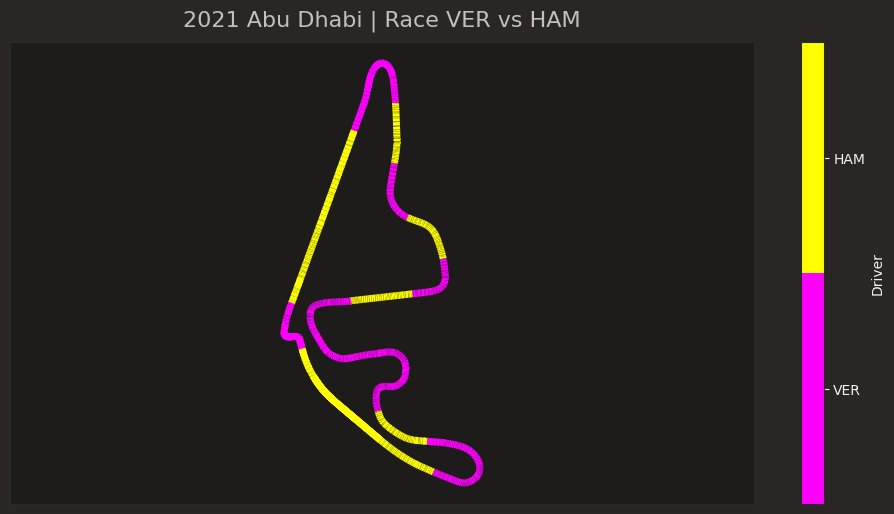

In [93]:
x = np.array(telemetry_drivers['X'].values)
y = np.array(telemetry_drivers['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry_drivers['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('spring',2) #RdBu, BuPu, viridis, https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [12, 6]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, label='Driver', boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 3.5))
cbar.set_ticklabels([driver01,driver02])

title_color = 'silver' # '#6441a5'
if (event)== "R" :
     event = "Race"
     
plt.title(f"{year} {gp} | {event} {driver01} vs {driver02}", color=title_color, fontsize = 16)

plt.show()